# fit sin(x) in [-3,3]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#data collection/creatation
X = np.linspace(-3,3,300).reshape(-1,1)
y = np.sin(X) + np.random.uniform(low=-0.5,high=0.5,size=300).reshape(-1,1)

print(X.shape)
print(y.shape)

(300, 1)
(300, 1)


## under-fitting vs proper-fitting vs over-fitting - plotting

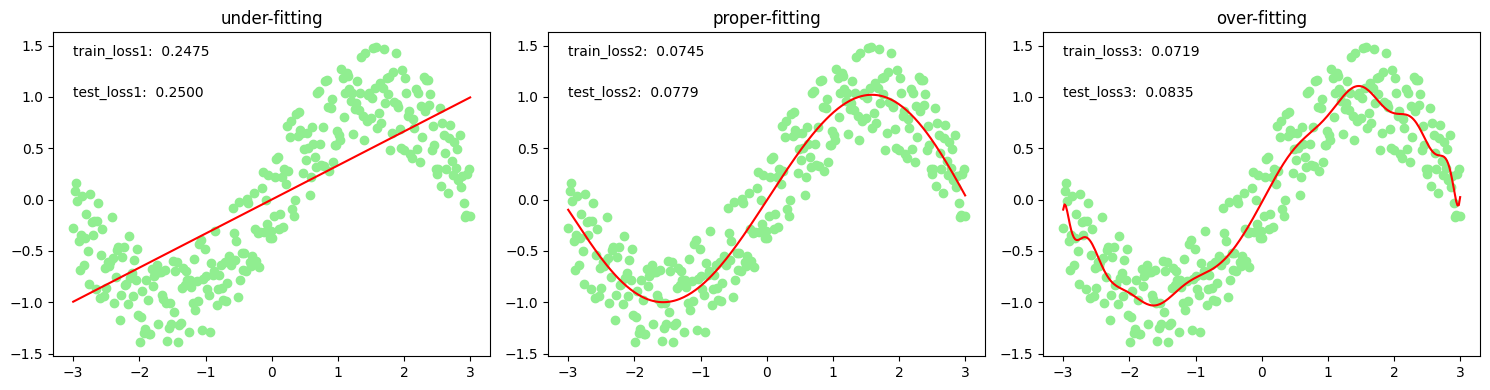

In [3]:
#under_fitting

fig,ax = plt.subplots(1,3,figsize = (15,4))
ax[0].scatter(X,y,color="lightgreen")
ax[1].scatter(X,y,color="lightgreen")
ax[2].scatter(X,y,color="lightgreen")


#train set & test set 
trainX, testX, trainY, testY = train_test_split(X,y,test_size = 0.2,random_state=42)

#model selection 
model = LinearRegression()

x_train1 = trainX
x_test1 = testX

#train model
model.fit(x_train1,trainY)

# print("model.coef: ", model.coef_)
# print("model.intercept: ", model.intercept_)

#predict result
y_pred1 = model.predict(x_test1)
test_loss1 = mean_squared_error(testY,y_pred1)
train_loss1 = mean_squared_error(trainY,model.predict(x_train1))

#plot and show 
ax[0].plot(X, model.predict(X), "red")
ax[0].text(-3,1,f"test_loss1: {test_loss1: .4f}")
ax[0].text(-3,1.4,f"train_loss1: {train_loss1: .4f}")
ax[0].set_title("under-fitting")




#(proper) fitting (5th Degree Polynomial):

poly5 = PolynomialFeatures(degree=5)
x_train2 = poly5.fit_transform(trainX) 
x_test2 = poly5.fit_transform(testX) 
# print(x_train2.shape, x_test2.shape)

model.fit(x_train2,trainY)

# print(model.coef_)
# print(model.intercept_)
#predict result
y_pred2 = model.predict(x_test2)
test_loss2 = mean_squared_error(testY,y_pred2)
train_loss2 = mean_squared_error(trainY,model.predict(x_train2))


#plot and show 
ax[1].plot(X, model.predict(poly5.fit_transform(X)), "red") # not X, should be poly5...
ax[1].text(-3,1,f"test_loss2: {test_loss2: .4f}")
ax[1].text(-3,1.4,f"train_loss2: {train_loss2: .4f}")
ax[1].set_title("proper-fitting")



#over-fitting (20 Degree Polynomial, Higher-Order Derivatives)
poly20 = PolynomialFeatures(degree=20)
x_train3 = poly20.fit_transform(trainX) 
x_test3 = poly20.fit_transform(testX) 
# print(x_train3.shape, x_test3.shape)

model.fit(x_train3,trainY)

# print(model.coef_)
# print(model.intercept_)
#predict result
y_pred3 = model.predict(x_test3)
test_loss3 = mean_squared_error(testY,y_pred3)
train_loss3 = mean_squared_error(trainY,model.predict(x_train3))

#plot and show 
ax[2].plot(X, model.predict(poly20.fit_transform(X)), "red") # not X, should be poly20...
ax[2].text(-3,1,f"test_loss3: {test_loss3: .4f}")
ax[2].text(-3,1.4,f"train_loss3: {train_loss3: .4f}")
ax[2].set_title("over-fitting")


plt.tight_layout()
plt.show()